# Data Wrangling, Machine Learning, Model Validation With Python
Based on [Crboerts](https://www.kaggle.com/croberts1/titanic-data-science-solutions).

----

Before attempting to train a model we need to examine the data. We divide it into the following sections:

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

We use the following tools:

- [Pandas](http://pandas.pydata.org/) for filter and filling missing data
- [Scikit Learn](http://scikit-learn.org/stable/) is a ML library with useful preprocessing capabilties
- [NumPy](http://www.numpy.org/) for manipulating N-dimension arrays
- [SciPy libraries](https://www.scipy.org/scipylib/index.html) for a set of numeric tools
- [Matplotlib](http://matplotlib.org/) for visualization
- [Seaborn](http://seaborn.pydata.org/) implements more visualization options on top of Matplotlib

When you want to know more about a function, you can use the built in documentation by putting the marker at the function an pressing __Shift__ + __Tab__

# Jupyter Notebook Tips

- `Tab` will auto-complete properties, functions and methods
- `Shift-Tab` will display documentation for property, function or methods under the caret
- `Control-Enter` will run the current selected cell
- `Alt-Enter` will run the current cell and start on next cell
- Jupyter will print result of the last line of code when running a cell. Good for testing and debugging.
- More shortcuts listed under Help-menu

In [132]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# Used for pretty print DataFrames
from IPython.display import display

import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


# Fix warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
# Set a seed to ensure that we get repeatable results
np.random.seed(1)

# Load the data
df_train = pd.read_csv('/data/Titanic_training_data.csv')

## Data analysis
### Overview of the data
What kind of data have we loaded? Which features are numerical and which are categorical? Do we have a lot of missing data, and if so, which features are missing data? 

.info() is a very useful function that gives an overview of the data and also helps us to some extent answer some of the questions.

In [61]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Most of the features are complete (not missing any data), as they have as many non null values as number of data points, but we are missing 2 values in __Embarked__ some values in __Age__ and a lot of values in __Cabin__.

Pandas have already helped us assign a data type for each feature when it loaded the data. About half of the features are numbers while the rest are objects (=strings). This doesn't mean that half are numerical features, as some categorical features may be ordinal (have a natural order) which are represented by the number, e.g. Pclass.

In [62]:
display(df_train.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Just by looking at the first 10 examples, we can already start to filter features that will most likely not be useful for our use case. These are __PassengerId__, __Name__ and __Ticket__. We will also remove the __Cabin__ feature, as it is missing in too many features.

Another thing to note is that __Sex__ and __Embarked__ are strings, which will not work very well for our algorithms later on, which is important to keep in mind.

In [63]:
df_dropped = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df_dropped.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the function call __.describe__, we get a table with the summary statistics about the numerical values in the data frame. This table gives as a lot of information about the distribution of the data.
* About 38 % of the passengers in the data set survived.
* The average age was around 30 year, but we can also see that 75 % of the passengers were younger than 38. This means that there are only 25 % left in the age bracket 38-80.
* The average person was traveling alone or with one other family member, as we can see by combining the averages of __SibSp__ and __ParCh__.
* The average price was around 32 (pounds?), but because the highest 25 % fares are in the bracket [31-512], we can see that there are most likely one or more outliers. 

### Correlation between features and survival
Let's see how the various features correlate with survival. We do this by grouping the data points together depending on the feature, and check the survival rate for each group. 

#### We begin by looking at the categorical values.

In [64]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    display(df_dropped[[col, 'Survived']].groupby([col], as_index=False).mean().sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,female,0.742038
1,male,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


From these tables, we can see
* There is a relationship between passenger class and survival rate.
* There is a relationship between gender and survival rate.
* There is correlation between the number of siblings/spouses and the survival rate, where generally more leads to lower survival rate.
* It is a bit more muddled when it comes to Parents/children.
* The site of embarkation as a minor effect on the survival rate.

#### A look at correlation between survival and numerical values
This is done by splitting the data into two groups depending on survival, and then draw the histogram for each numerical value. The histogram tells us how often a certain value comes up in our data set. So the main thing we want to do is to look if the specific feature has any impact (difference) on the histograms.

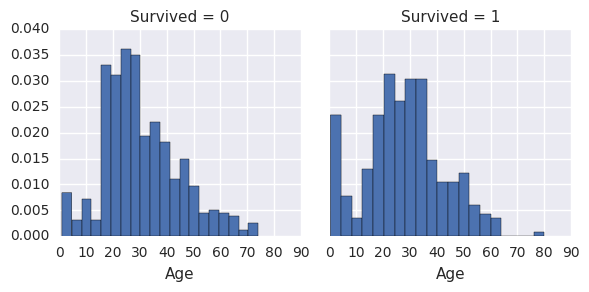

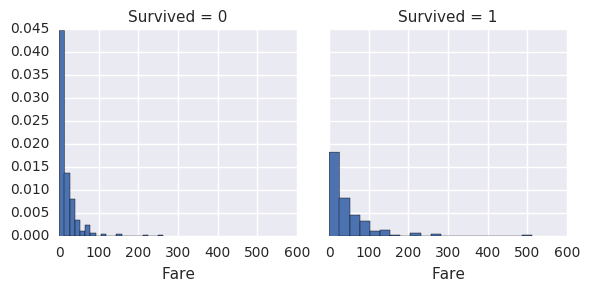

In [65]:
for col in ['Age', 'Fare']:
    plot = sns.FacetGrid(df_dropped, col='Survived')
    plot.map(plt.hist, col, bins=20, normed=True)

From these plots, we see that the age didn't really play that much of a difference, except for babies, which has a much higher relative survival rate. As for the fare, it had a bit more difference between the two groups, where paying higher fares gave a higher survival rate.

## Data Wrangling
Now it's time to actually work with the data instead of just analysing it. We start this by dropping the __Fare__ feature.

In [93]:
df_wrangling = df_dropped.drop(['Fare'], axis=1)

Now we'll try to fix the problem of missing values in some features. This can be done either filling the values in some way or just throwing away the whole example that has a certain missing value. In our case, we have __Embarked__, which is missing 2 values, while __Age__ is missing more than that. Because __Embarked__ is only missing 2 values, we'll fill it using the most common value. As for the __Age__ feature, we suspect that there are differences in age depending on the gender and class that the passenger belongs to. Therefore, we will calculate the average age in each passenger group and use that the fill the __Age__ feature. To make the algorithms easier to work with, we convert the categorical string values of __Age__ and __Embarked__ into ordinal numerical values.

In [94]:
print(df_wrangling['Embarked'].value_counts())

df_fill = df_wrangling
df_fill['Embarked'] = df_fill['Embarked'].fillna('S')

# Convert into numerical values
df_fill['Sex'] = df_fill['Sex'].map( {'female':1, 'male':0}).astype(int)
df_fill['Embarked'] = df_fill['Embarked'].map( {'S':0, 'C': 1, 'Q': 2}).astype(int)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [102]:
age_mean = np.zeros((2, 3))
df_filled = df_fill

# Calculate the average age of each group
for i in range(0, 2):
    for j in range(0, 3):
        age_mean[i,j] = df_filled[(df_filled["Sex"] == i) & (df_filled["Pclass"] == j)]["Age"].dropna().mean()

# Fill in the calculated average age into each data point that is missing age
for i in range(0, 2):
        for j in range(0, 3):
            df_filled.loc[ (df_filled['Age'].isnull()) & (df_filled['Sex'] == i) & (df_filled['Pclass'] == j),'Age'] = age_mean[i,j]

# Reformat into int data type            
df_filled['Age'] = df_filled['Age'].astype(int)
df_filled.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,0
1,1,1,1,38,1,0,1
2,1,3,1,26,0,0,0
3,1,1,1,35,1,0,0
4,0,3,0,35,0,0,0
5,0,3,0,30,0,0,2
6,0,1,0,54,0,0,0
7,0,3,0,2,3,1,0
8,1,3,1,27,0,2,0
9,1,2,1,14,1,0,1


After having filled the missing values, we will now see if we can construct new features from the existing ones that may help when we train our model. Just as with everything else, a big part of the process is to do trial and error, so therefore the features that we create may not necessarily improve our model.

We will show you one way of creating new features, but there are many other ways to do this, only limited by your creativity. In this case, we will combine the features __SibSp__ and __Parch__ into a new feature, call it __FamSize__, because they were both somewhat correlating low number with higher survival rate. We will threshold this new feature so that passengers with __FamSize__ lower than 4 will be 0 and higher will be 1.

In [128]:
df_feat = df_filled.drop(['SibSp', 'Parch'], axis=1)
temp = df_filled['SibSp'] + df_filled['Parch']
temp[temp <= 3] = 0
temp[temp > 3] = 1
df_feat['FamSize'] = temp 

In [129]:
# User defined function to plot confusion matrices
def plot_confusion_matrix(cm, nbr_data, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Died", "Survived"], rotation=45)
    plt.yticks(tick_marks, ["Died", "Survived"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.810324594257
[[ 0.8862306   0.1137694 ]
 [ 0.31179476  0.68820524]]


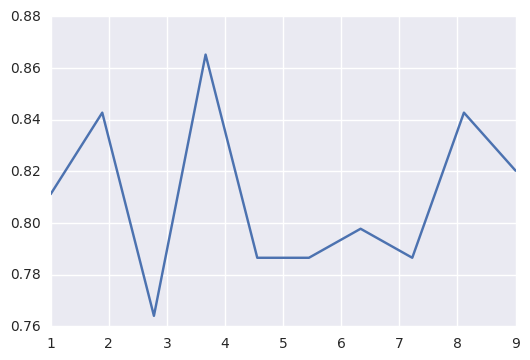

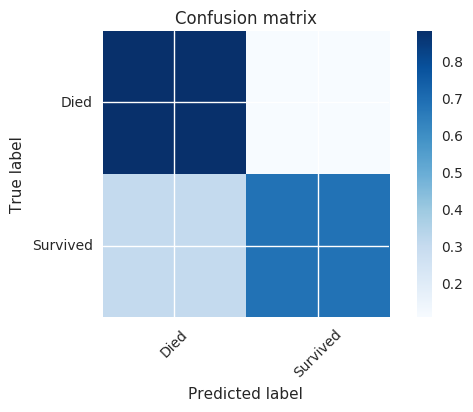

In [136]:

y = df_feat["Survived"].values
X = df_feat.drop(['Survived'], axis=1).values

# Reproducibility
rng = np.random.RandomState(1234)
nbr_folds = 10

#classifier = RandomForestClassifier(n_estimators=100, random_state=rng)

classifier = LogisticRegression()

results = []
predictions = []
confusion_matrices = []
kf = KFold(df_feat.shape[0], n_folds=nbr_folds, random_state=rng)
for train, test in kf:
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[test])
    results.append(np.mean(y_pred == y[test]))
    predictions.append(y_pred == y[test])
    cm = confusion_matrix(y[test], y_pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    confusion_matrices.append(cm)

cms = np.zeros(confusion_matrices[0].shape)
for cm in confusion_matrices:
    cms = cms + cm / len(confusion_matrices)
    
plt.plot(np.linspace(1, nbr_folds-1, num=nbr_folds), np.array(results))
print(np.array(results).mean())
plt.figure()
plot_confusion_matrix(cms, y.size)
print(cms)

# Conclusion

We're finally at the end of this example, but that doesn't mean that we're necessarily done with the data set and machine learning work. Although we have a model that can predict survival, as we can see in the model validation, it's still a bit from perfect. We've just started analysing and processing the data and chosen a few features to use when training our linear regression model. From here, there are several paths that we can take to improve the performance of our model. We could:

* Go through the data wrangling part again to see if there are any other ways we could process the data and pick new features.
* Pick a new machine learning algorithm to use. Here are some example that could be used: Support Vector Classifier, KNeighborsClassifier, GaussianProcessClassifier, Random Forest Classifier. Each of these algorithms require hyper parameters that need to be chosen for it to work, which makes them more or less harder to use, but they are mostly well explained in the documentation in Scikit-learn.
* Split the data set into smaller parts (up to you how to split it) where you train a new model for each part and then combine the result in some way (average the result? majority vote?).

# Next step: Competition - Income prediction